In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('assets/cars2025.csv', encoding='latin-1')

In [3]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [5]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [6]:
df.dropna(inplace=True)

## Preprocessing

In [7]:
import re


def remove_chars(val, chars):
    if not chars:
        return val
    for r in chars:
        val = val.replace(r, '')
    return val

def clean_interval(interval, range_regex, replaces=None):
    match = re.search(range_regex, interval)
    if match:
        x = remove_chars(match.group(1), replaces)
        y = remove_chars(match.group(2), replaces)
        return (float(x) + float(y)) / 2
    return None


def clean_single(val, regex, replaces=None):
    match = re.search(regex, val)
    if match:
        x = remove_chars(match.group(1), replaces)
        return float(x)
    else:
        return None

In [8]:
def clean_hp(v):
    interval = clean_interval(v, r"(\d+)\D+(\d+)")
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\d+)")
        return single if single else None


def clean_performance(v):
    interval = clean_interval(v, r'(\d+\.\d+)\s.*?\s(\d+\.\d+)')
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\d+\.?\d*)")
        return single if single else None
        

def clean_price(v):
    interval = clean_interval(v, r'(\$\d{1,3}(?:,\d{3})*)\s*-\s*(\$\d{1,3}(?:,\d{3})*)', '$,.')
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\$\d{1,3}(?:,\d{3})*)", '$,.')
        return single if single else None
    

def clean_cc(v):
    v = v.replace('cc', '').replace(',', '').strip()
    try:
        return float(v)
    except:
        return None


In [9]:
df['HorsePower'] = df['HorsePower'].apply(clean_hp)
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(clean_performance)
df['Torque'] = df['Torque'].apply(clean_hp)
df['Total Speed'] = df['Total Speed'].apply(clean_hp)
df['Cars Prices'] = df['Cars Prices'].apply(clean_price)
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(clean_cc)

In [10]:
df['Company Names'] = df['Company Names'].str.lower().str.strip()

In [11]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,ferrari,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,rolls royce,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,ford,KA+,1.2L Petrol,1200.0,77.5,165.0,10.5,13500.0,Petrol,5,120.0
3,mercedes,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,audi,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0


<Axes: ylabel='count'>

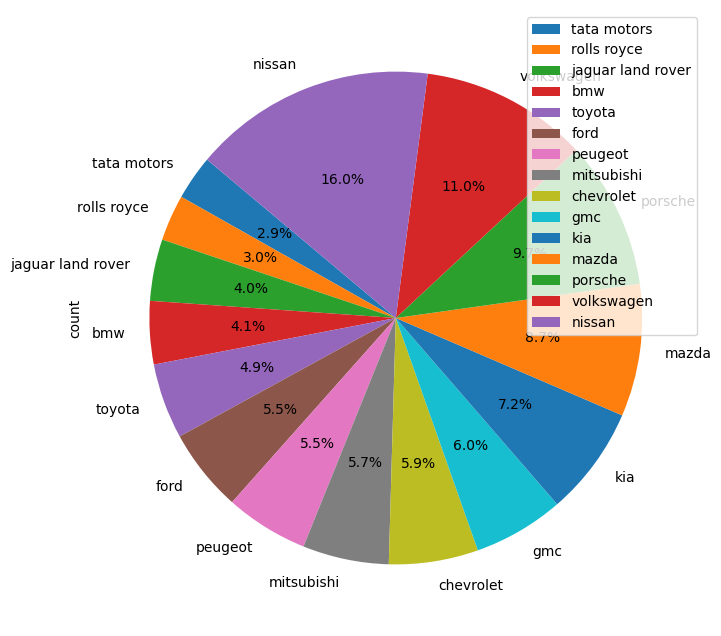

In [12]:
df['Company Names'].value_counts().sort_values(ascending=True).tail(15).plot.pie(figsize=(8, 8), autopct='%1.1f%%', startangle=140, legend=True)

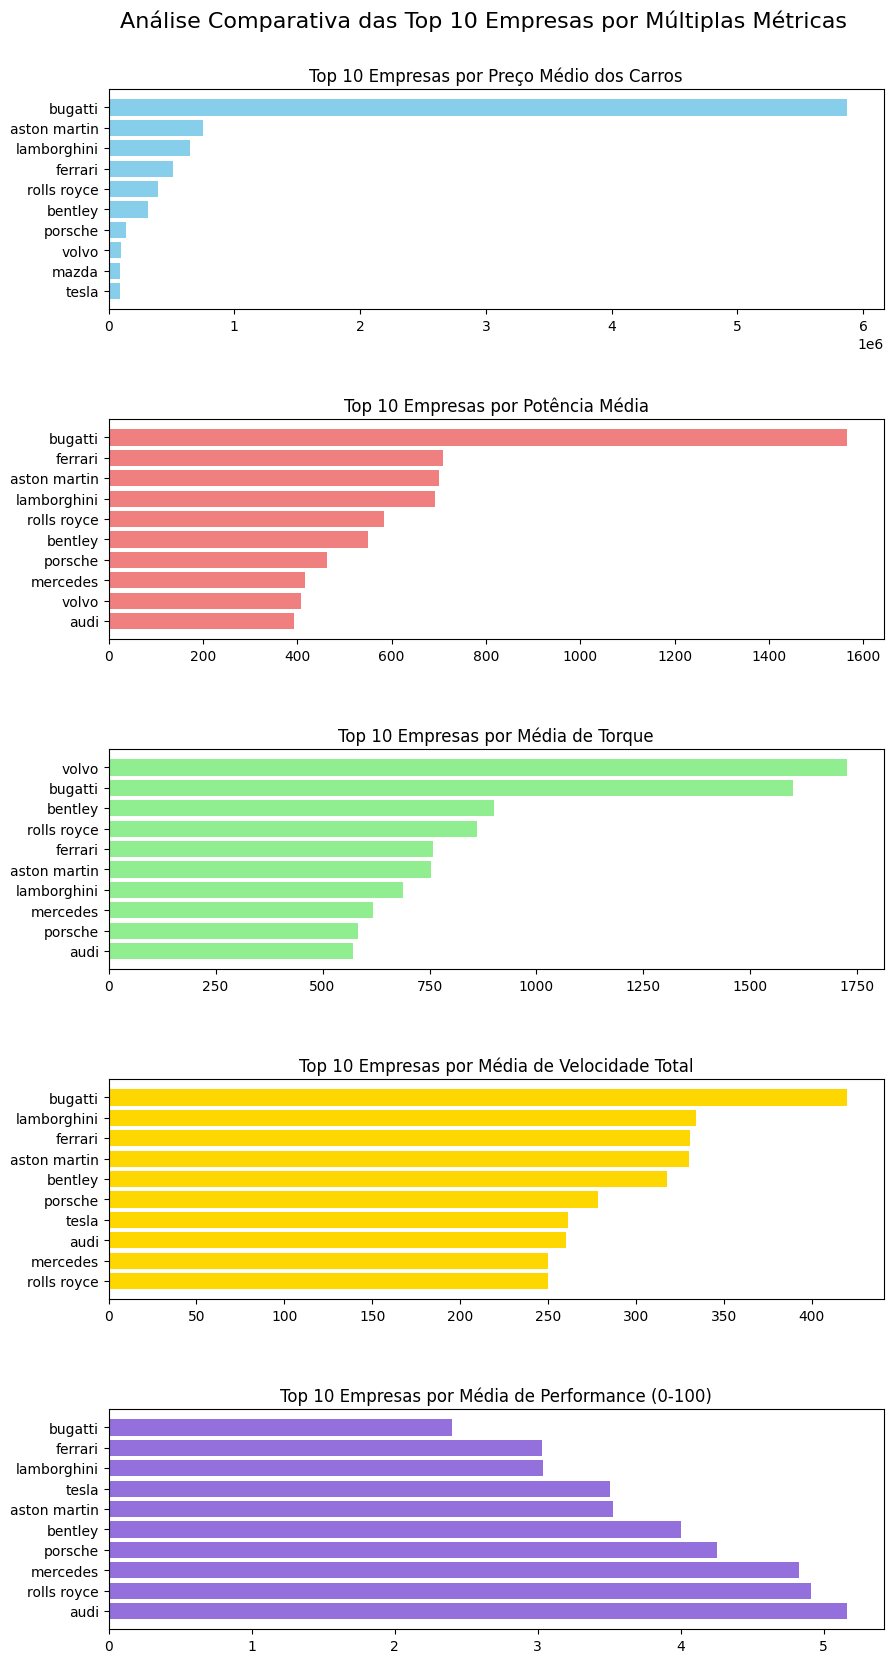

In [13]:
data_price = df['Cars Prices'].groupby(df['Company Names']).mean().sort_values(ascending=False).head(10).sort_values(ascending=True)
data_hp = df['HorsePower'].groupby(df['Company Names']).mean().sort_values(ascending=False).head(10).sort_values(ascending=True)
data_torque = df['Torque'].groupby(df['Company Names']).mean().sort_values(ascending=False).head(10).sort_values(ascending=True)
data_speed = df['Total Speed'].groupby(df['Company Names']).mean().sort_values(ascending=False).head(10).sort_values(ascending=True)
data_performance = df['Performance(0 - 100 )KM/H'].groupby(df['Company Names']).mean().sort_values(ascending=True).head(10).sort_values(ascending=False)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20)) 
plt.subplots_adjust(hspace=0.5)

axes[0].barh(data_price.index, data_price.values, color='skyblue')
axes[0].set_title('Top 10 Empresas por Preço Médio dos Carros')

axes[1].barh(data_hp.index, data_hp.values, color='lightcoral')
axes[1].set_title('Top 10 Empresas por Potência Média')

axes[2].barh(data_torque.index, data_torque.values, color='lightgreen')
axes[2].set_title('Top 10 Empresas por Média de Torque')

axes[3].barh(data_speed.index, data_speed.values, color='gold')
axes[3].set_title('Top 10 Empresas por Média de Velocidade Total')

axes[4].barh(data_performance.index, data_performance.values, color='mediumpurple')
axes[4].set_title('Top 10 Empresas por Média de Performance (0-100)')

plt.suptitle('Análise Comparativa das Top 10 Empresas por Múltiplas Métricas', fontsize=16, y=0.92) # Título geral
plt.show()

<Axes: xlabel='Cars Prices', ylabel='Density'>

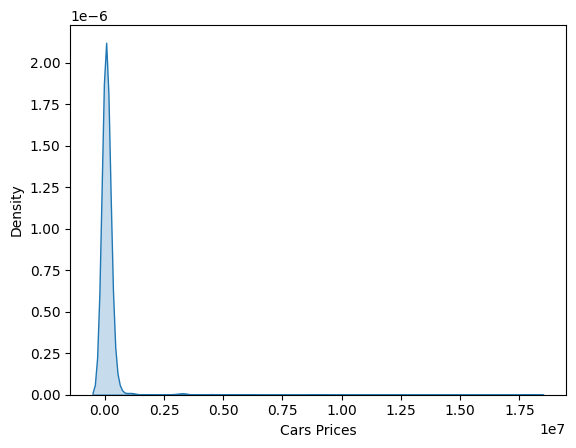

In [14]:
sns.kdeplot(data=df, x='Cars Prices', fill=True)

In [15]:
def remove_outliers(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    up = Q3 + k * IQR
    down = Q1 - k * IQR
    
    return df[(df[column] >= down) & (df[column] <= up)]

<Axes: >

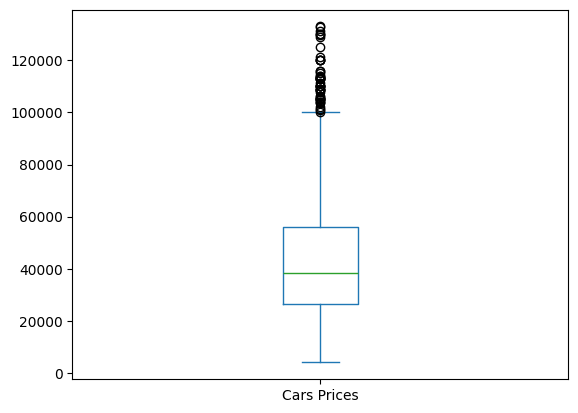

In [16]:
df_filtred = remove_outliers(df, 'Cars Prices')
df_filtred['Cars Prices'].plot.box()

array([[<Axes: title={'center': 'CC/Battery Capacity'}>,
        <Axes: title={'center': 'HorsePower'}>],
       [<Axes: title={'center': 'Total Speed'}>,
        <Axes: title={'center': 'Performance(0 - 100 )KM/H'}>],
       [<Axes: title={'center': 'Cars Prices'}>,
        <Axes: title={'center': 'Torque'}>]], dtype=object)

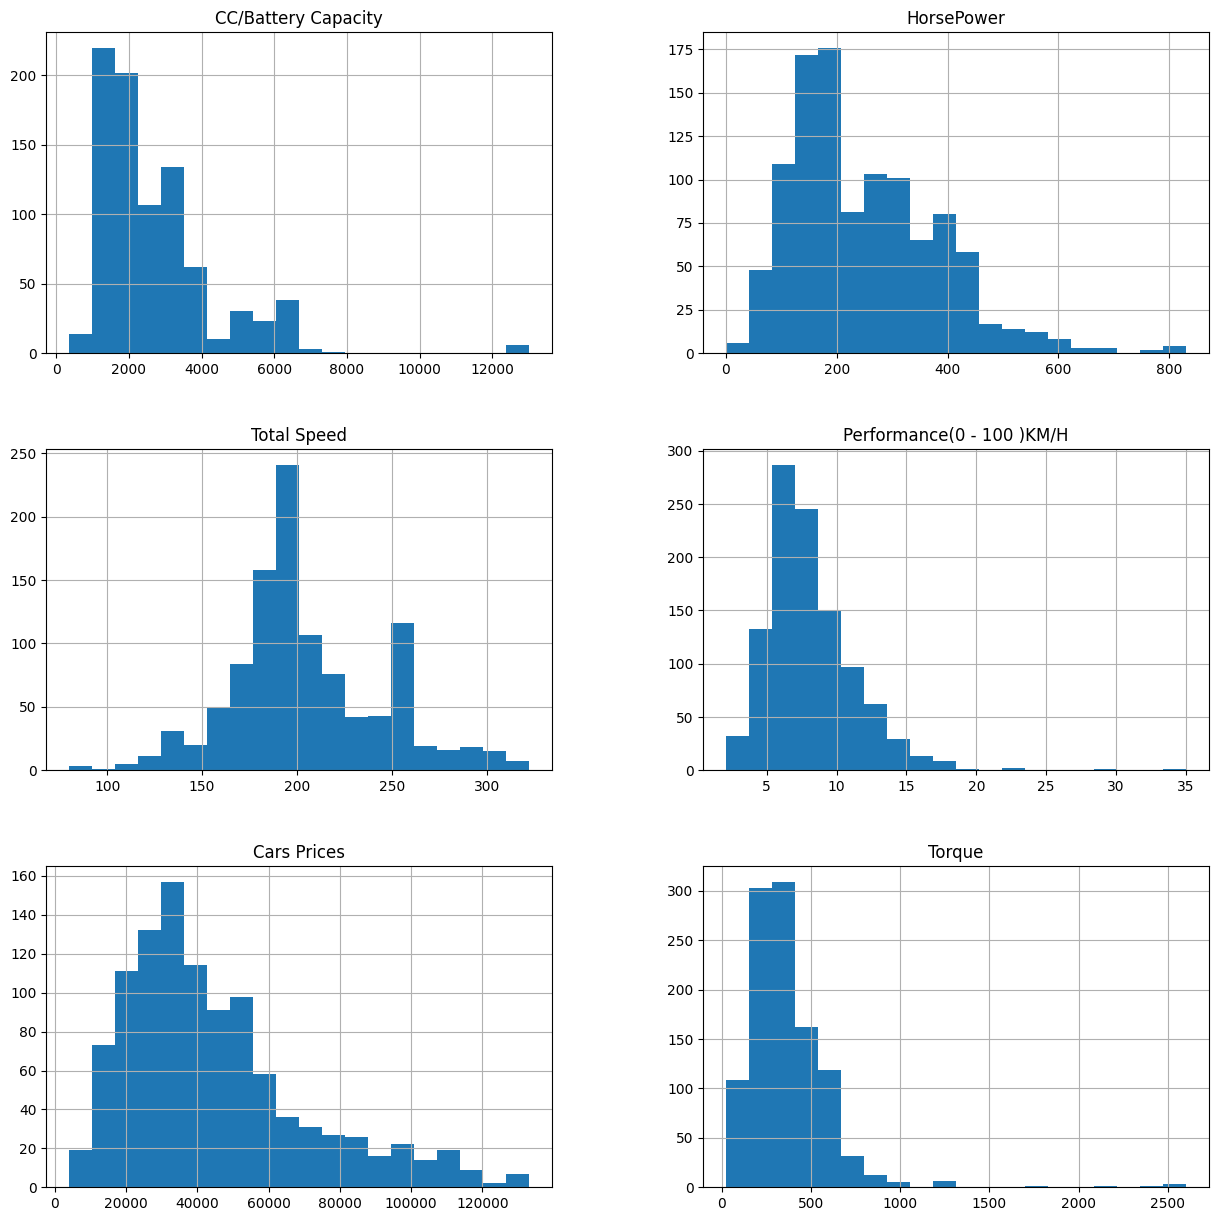

In [17]:
df_filtred.hist(bins=20, figsize=(15,15))

<Axes: xlabel='Cars Prices', ylabel='Count'>

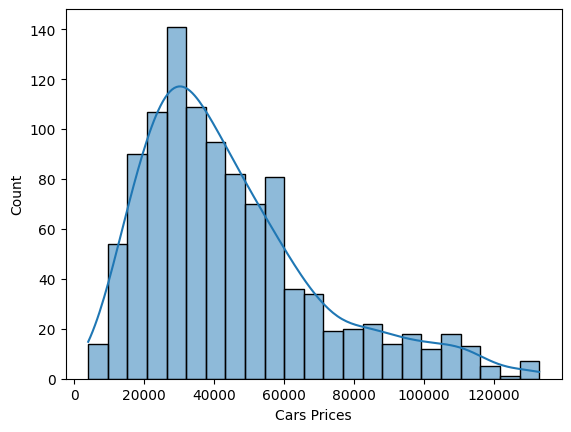

In [18]:
sns.histplot(x=df_filtred['Cars Prices'], kde=True)

In [19]:
from scipy import stats

def ic_prices(prices):
    mean = prices.mean()
    sem = stats.sem(prices.values)

    confidence = 0.95
    h = sem * stats.t.ppf((1 + confidence) / 2, len(prices) - 1)

    lower = mean - h
    upper = mean + h

    print(f"Média = {mean:.2f}")
    print(f"IC 95% = ({lower:.2f}, {upper:.2f})")

In [20]:
ic_prices(df[df['Company Names'] == 'volkswagen']['Cars Prices'])

Média = 36301.24
IC 95% = (32956.20, 39646.28)


In [21]:
ic_prices(df[df['Company Names'] == 'nissan']['Cars Prices'])

Média = 59392.03
IC 95% = (39667.18, 79116.87)


<Axes: xlabel='Cars Prices', ylabel='Density'>

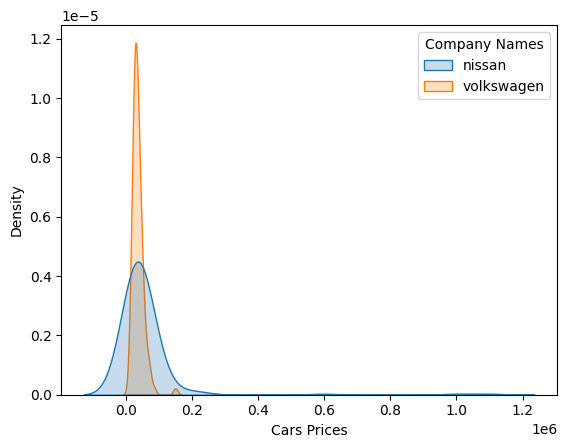

In [22]:
df_volkswagen_nissan = df[df['Company Names'].isin(['nissan', 'volkswagen'])]

sns.kdeplot(data=df_volkswagen_nissan, x='Cars Prices', hue='Company Names', fill=True)

In [23]:
from scipy import stats
import pandas as pd


def t_to_d(t, n1, n2):
    return t * ((1/n1 + 1/n2) ** 0.5)


def t_test(a_name, b_name):
    
    group_a = df[df['Company Names'] == a_name].copy()
    group_b = df[df['Company Names'] == b_name].copy()

    resultados = []

    colunas = ['Cars Prices', 'Total Speed', 'Torque', 
               'Performance(0 - 100 )KM/H', 'HorsePower', 'CC/Battery Capacity']


    for col in colunas:
        A = group_a[col].dropna()
        B = group_b[col].dropna()

        if len(A) < 2 or len(B) < 2:
            print(f"Baixo Número de amostras {col}. Teste pulado.")
            continue

        if A.var() == 0 or B.var() == 0:
            print(f"Sem variância em {col}. Teste pulado.")
            continue

        t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)
        d = t_to_d(t_stat, len(A), len(B))

        if d > 0:
            direction = '(+)'
        else:
            direction = '(-)'

        dabs = abs(d)
        if dabs <= 0.50:
            direction += "*"
        elif dabs <= 0.8:
            direction += "**"
        elif dabs <= 1.2:
            direction += "***"
        elif dabs >= 2:
            direction += "****"
        
        resultados.append({
            'Atributo': col,
            f'Média {a_name}': A.mean(),
            f'Média {b_name}': B.mean(),
            'p-value': p_value,
            'd': direction,
            'h1': 'Aceita' if p_value < 0.05 else 'Rejeitada'
        })

    return pd.DataFrame(resultados)


In [24]:
t_test('lamborghini', 'ferrari')

,Atributo,Média lamborghini,Média ferrari,p-value,d,h1
0,Cars Prices,650083.333333,512222.222222,0.605933,(+)*,Rejeitada
1,Total Speed,334.000000,331.111111,0.578073,(+)*,Rejeitada
2,Torque,687.083333,757.444444,0.002279,(-),Aceita
3,Performance(0 - 100 )KM/H,3.037500,3.033333,0.969928,(+)*,Rejeitada
4,HorsePower,691.541667,709.888889,0.677864,(-)*,Rejeitada
5,CC/Battery Capacity,5595.833333,4486.888889,0.022617,(+)***,Aceita


In [25]:
t_test('toyota', 'volkswagen')

,Atributo,Média toyota,Média volkswagen,p-value,d,h1
0,Cars Prices,41627.244898,36301.238532,0.153030,(+)*,Rejeitada
1,Total Speed,194.428571,203.587156,0.044868,(-)*,Aceita
2,Torque,366.897959,308.018349,0.019770,(+)*,Aceita
3,Performance(0 - 100 )KM/H,8.115306,8.539450,0.286072,(-)*,Rejeitada
4,HorsePower,234.346939,189.720183,0.002621,(+)**,Aceita
5,CC/Battery Capacity,2740.475000,1937.565217,0.000104,(+)***,Aceita


In [26]:
t_test('ford', 'nissan')

,Atributo,Média ford,Média nissan,p-value,d,h1
0,Cars Prices,53457.685185,59392.025316,0.655294,(-)*,Rejeitada
1,Total Speed,198.592593,202.702532,0.497643,(-)*,Rejeitada
2,Torque,436.166667,338.854430,0.002807,(+)*,Aceita
3,Performance(0 - 100 )KM/H,7.325000,8.499367,0.004165,(-)*,Aceita
4,HorsePower,314.972222,246.949367,0.003174,(+)*,Aceita
5,CC/Battery Capacity,3218.750000,2842.802632,0.237425,(+)*,Rejeitada


In [27]:
t_test('audi', 'bmw')

,Atributo,Média audi,Média bmw,p-value,d,h1
0,Cars Prices,82870.952381,67317.073171,0.358525,(+)*,Rejeitada
1,Total Speed,260.476190,240.463415,0.051332,(+)**,Rejeitada
2,Torque,571.333333,422.682927,0.000468,(+)***,Aceita
3,Performance(0 - 100 )KM/H,5.161905,6.880488,0.001099,(-)***,Aceita
4,HorsePower,393.190476,274.536585,0.004706,(+)**,Aceita
5,CC/Battery Capacity,3118.368421,2353.450000,0.012558,(+)**,Aceita
